# Hierarchical Clustering

K-Means required us to guess $K$ (number of clusters) beforehand (or use the Elbow Method). 
**Hierarchical Clustering** takes a different approach. It builds a hierarchy of clusters, which we can visualize as a tree (**Dendrogram**).

### Agglomerative (Bottom-Up) Strategy
1.  **Start:** Treat every single data point as its own tiny cluster.
2.  **Combine:** Find the two closest clusters and merge them.
3.  **Repeat:** Keep merging until everyone is in one giant cluster.
4.  **Cut:** We look at the tree and decide where to "cut" the branches to form groups.

## Load Data (Mall Customers)
We reuse the Mall Customers dataset to compare directly with K-Means.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import os

# Download Dataset if not exists
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
save_path = "Mall_Customers.csv"

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

df = pd.read_csv(save_path)
X = df.iloc[:, [3, 4]].values  # Annual Income, Spending Score

print(f"Data Loaded: {X.shape[0]} customers")

Data Loaded: 200 customers


## The Dendrogram (The Decision Tree of Clustering)
We use `scipy` to calculate the distances and draw the tree.

**How to read it:**
- The vertical lines represent distances.
- The longer the vertical line (without being crossed by horizontal lines), the more distinct the separation is.
- We usually cut the tree through the longest vertical lines.

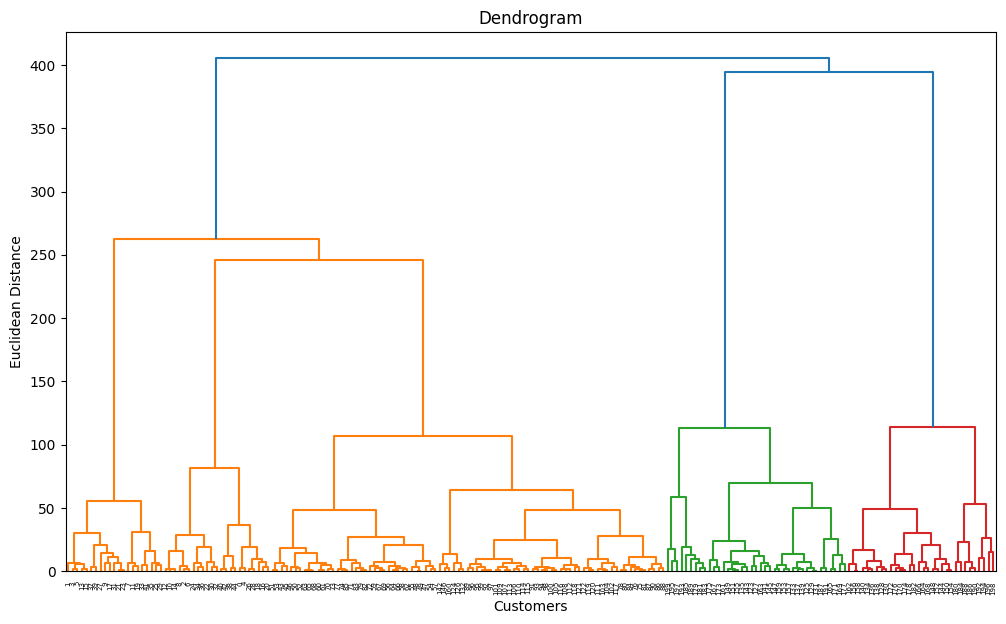

In [2]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 7))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")

# 'ward' method minimizes variance within clusters (similar to K-Means logic)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()

### Interpreting the Dendrogram
Look for the longest vertical lines. 
You can visually see 5 main branches if you draw a horizontal line around distance=200.
This confirms our **K=5** finding from the Elbow Method!

## Train the Model
Now we use `AgglomerativeClustering` from sklearn with `n_clusters=5`.

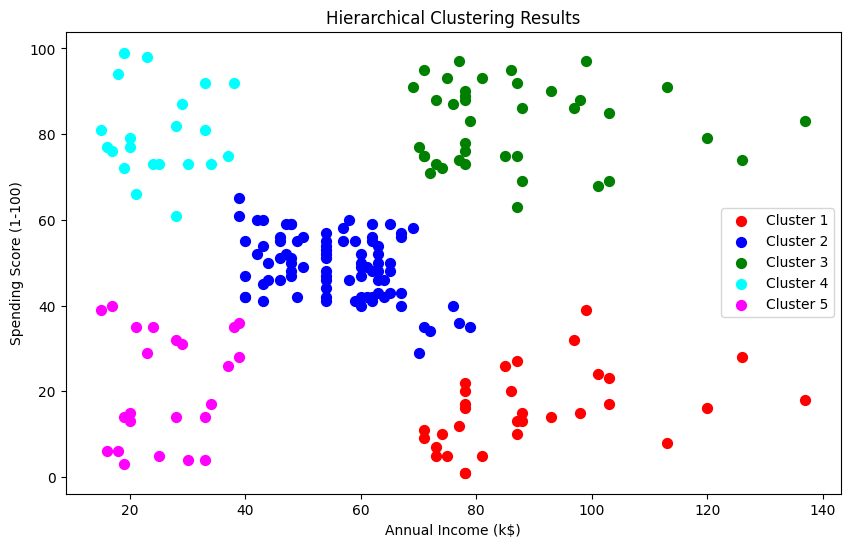

In [3]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualize
plt.figure(figsize=(10, 6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')

plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Conclusion
The results are almost identical to K-Means. 
- **Pros of Hierarchical:** beautiful visualization (Dendrogram), no need to fix K initially.
- **Cons:** Very slow on large datasets ($O(n^3)$ or $O(n^2)$ complexity).